<a href="https://colab.research.google.com/github/JimitDhamecha/Enter-Week-1/blob/main/air_quality_index_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/air quality data.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
df.dropna(subset=['AQI'], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [ ]:
df.shape

(24850, 16)

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
null_values_percentage = (df.isnull().sum()/ df.isnull().count() *100).sort_values(ascending=False)
null_values_percentage

,0
Xylene,61.322001
PM10,37.723071
NH3,34.973418
Toluene,27.229014
Benzene,19.041008
AQI,15.851139
AQI_Bucket,15.851139
PM2.5,15.570079
NOx,14.171549
O3,13.619586


# Week 2

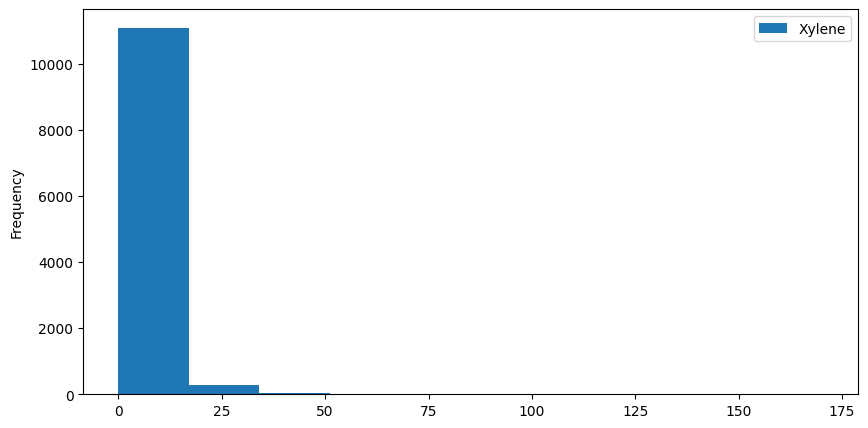

In [8]:
df['Xylene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

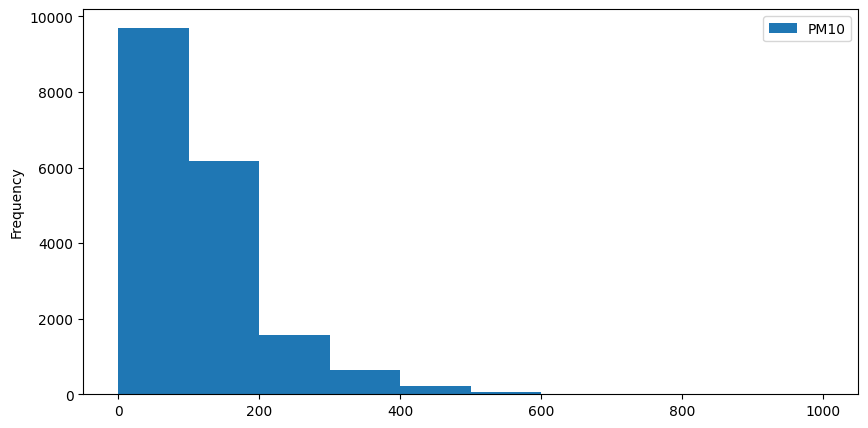

In [9]:
df['PM10'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

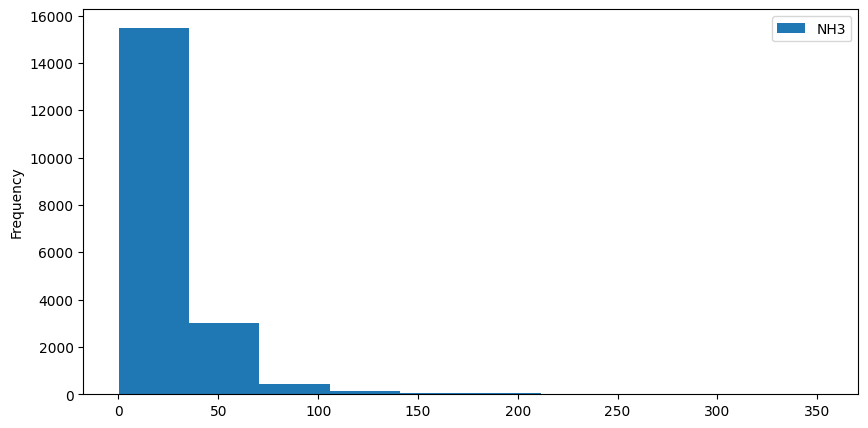

In [10]:
df['NH3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

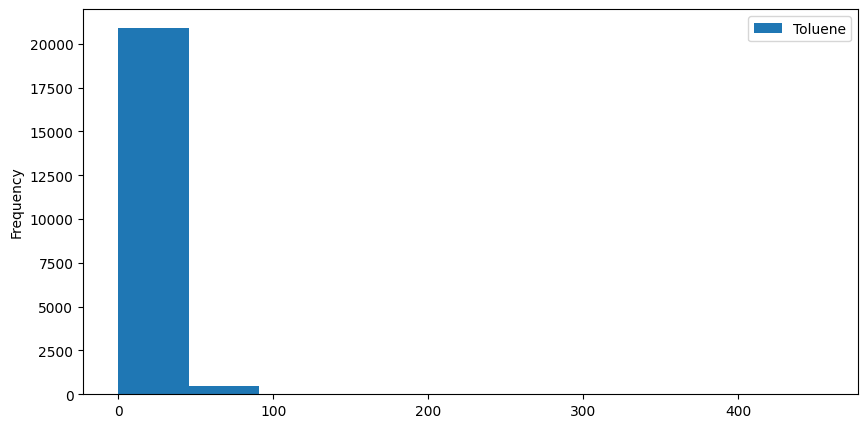

In [13]:
df['Toluene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

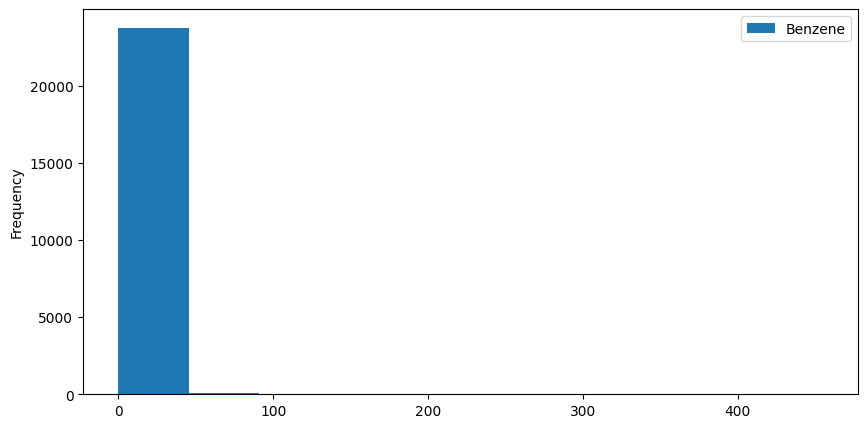

In [15]:
df['Benzene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

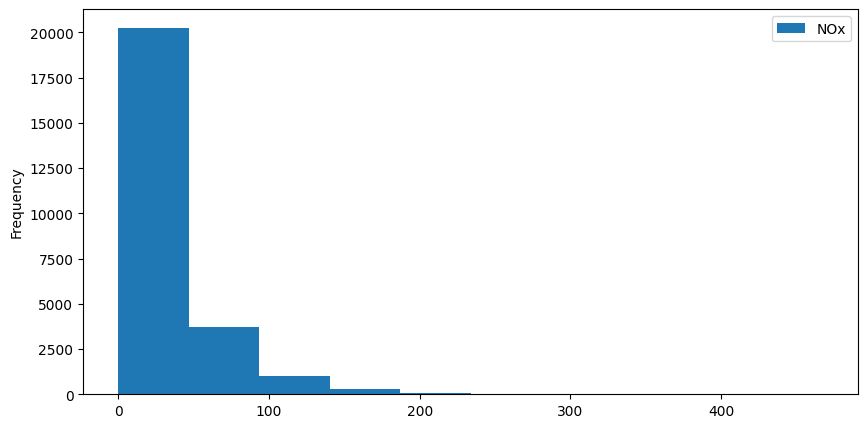

In [16]:
df['NOx'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

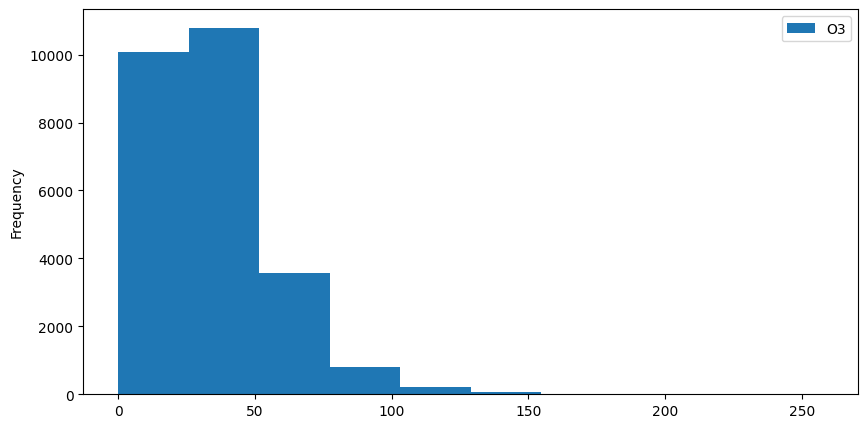

In [17]:
df['O3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

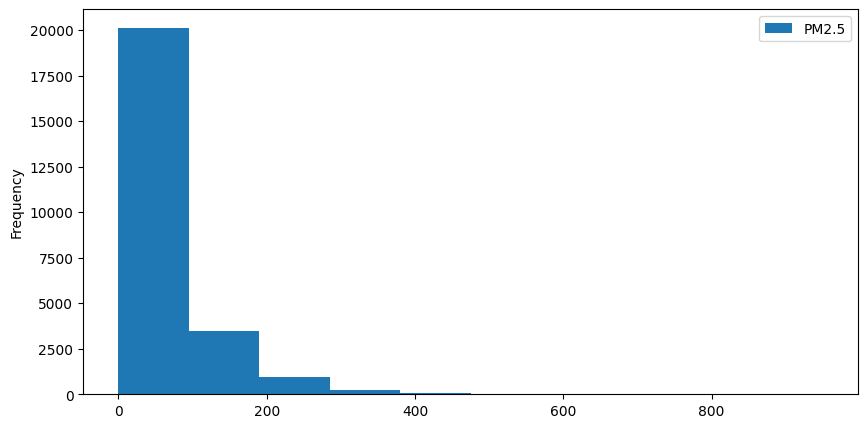

In [19]:
df['PM2.5'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

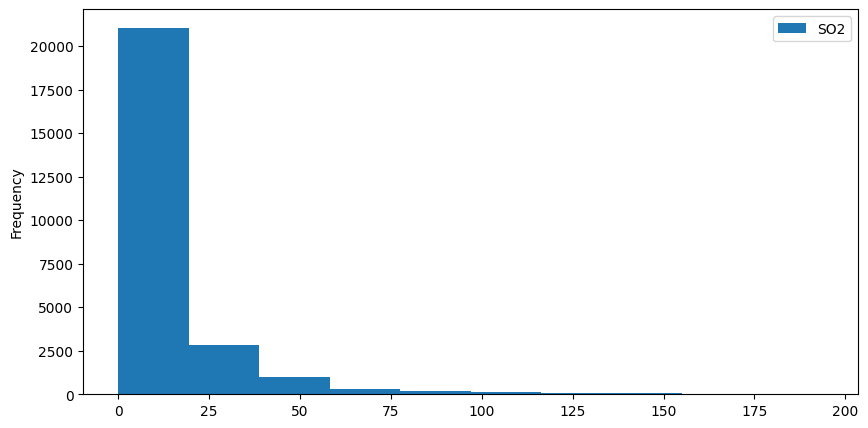

In [20]:
df['SO2'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

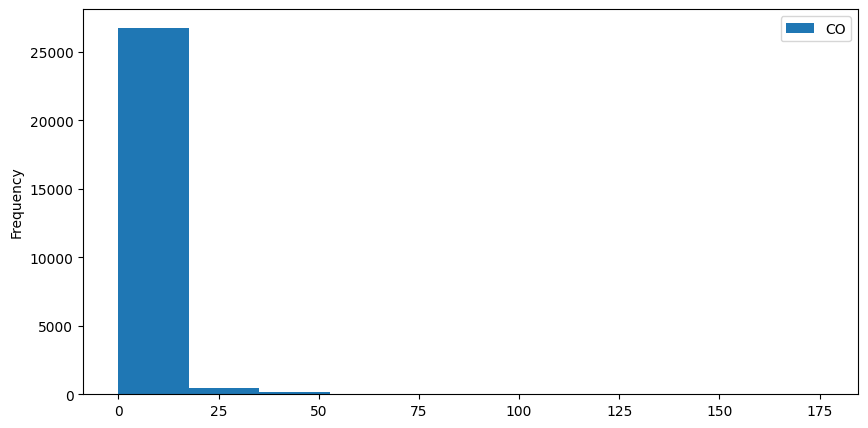

In [21]:
df['CO'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

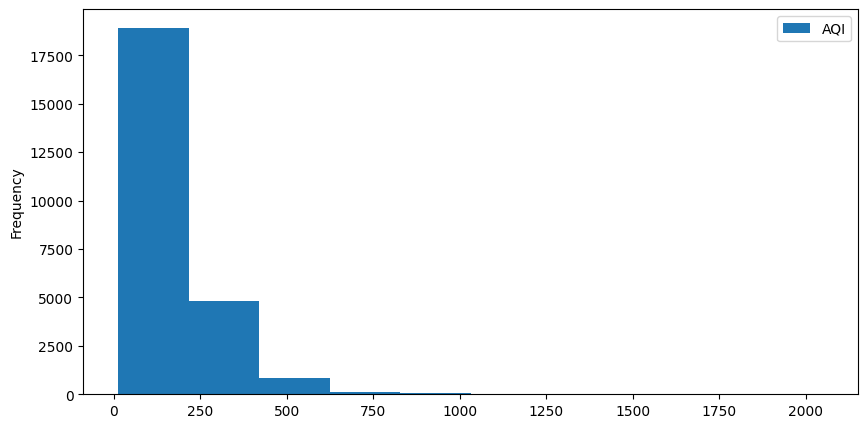

In [22]:
df['AQI'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

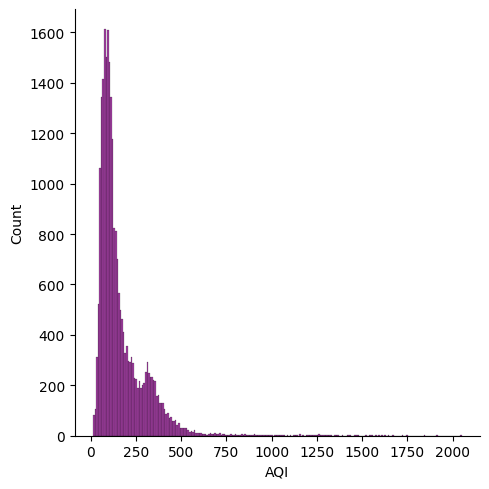

In [23]:
sns.displot(df, x='AQI',color='purple')
plt.show()

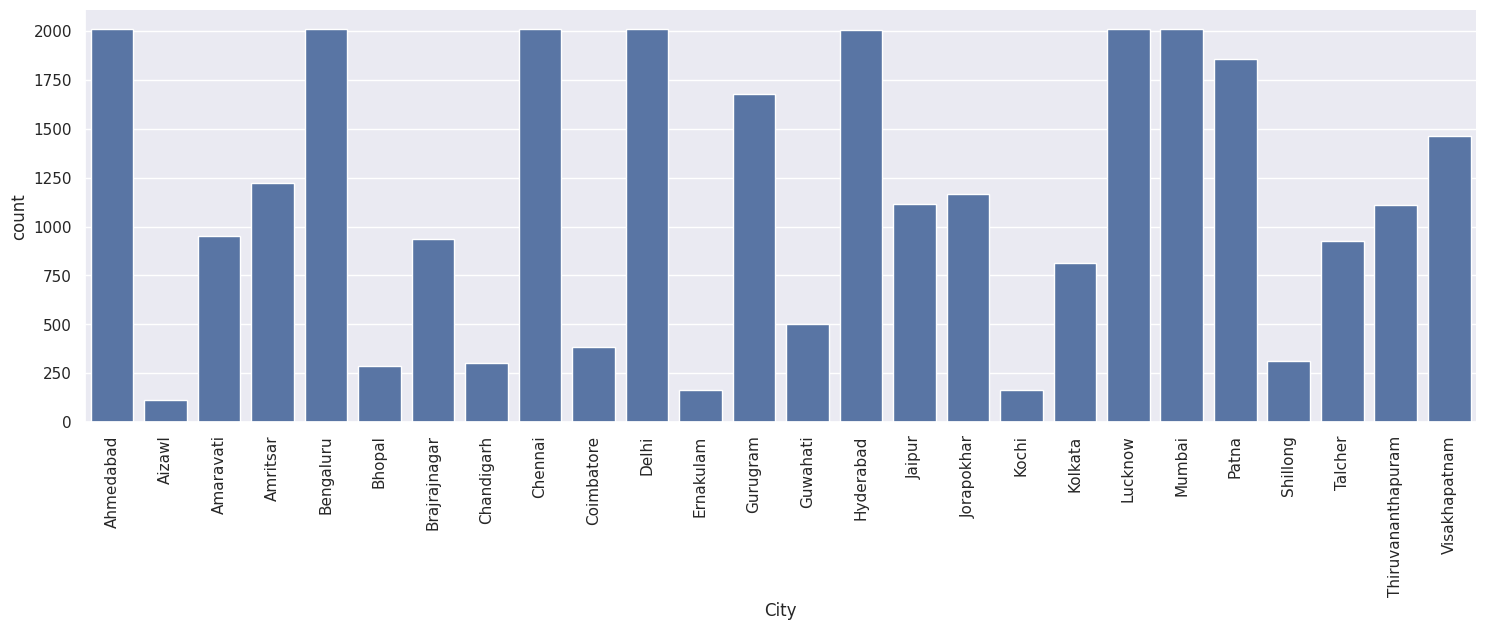

In [28]:
sns.set_theme(style='darkgrid')
graph = sns.catplot(x="City", kind='count', data = df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)
plt.show()

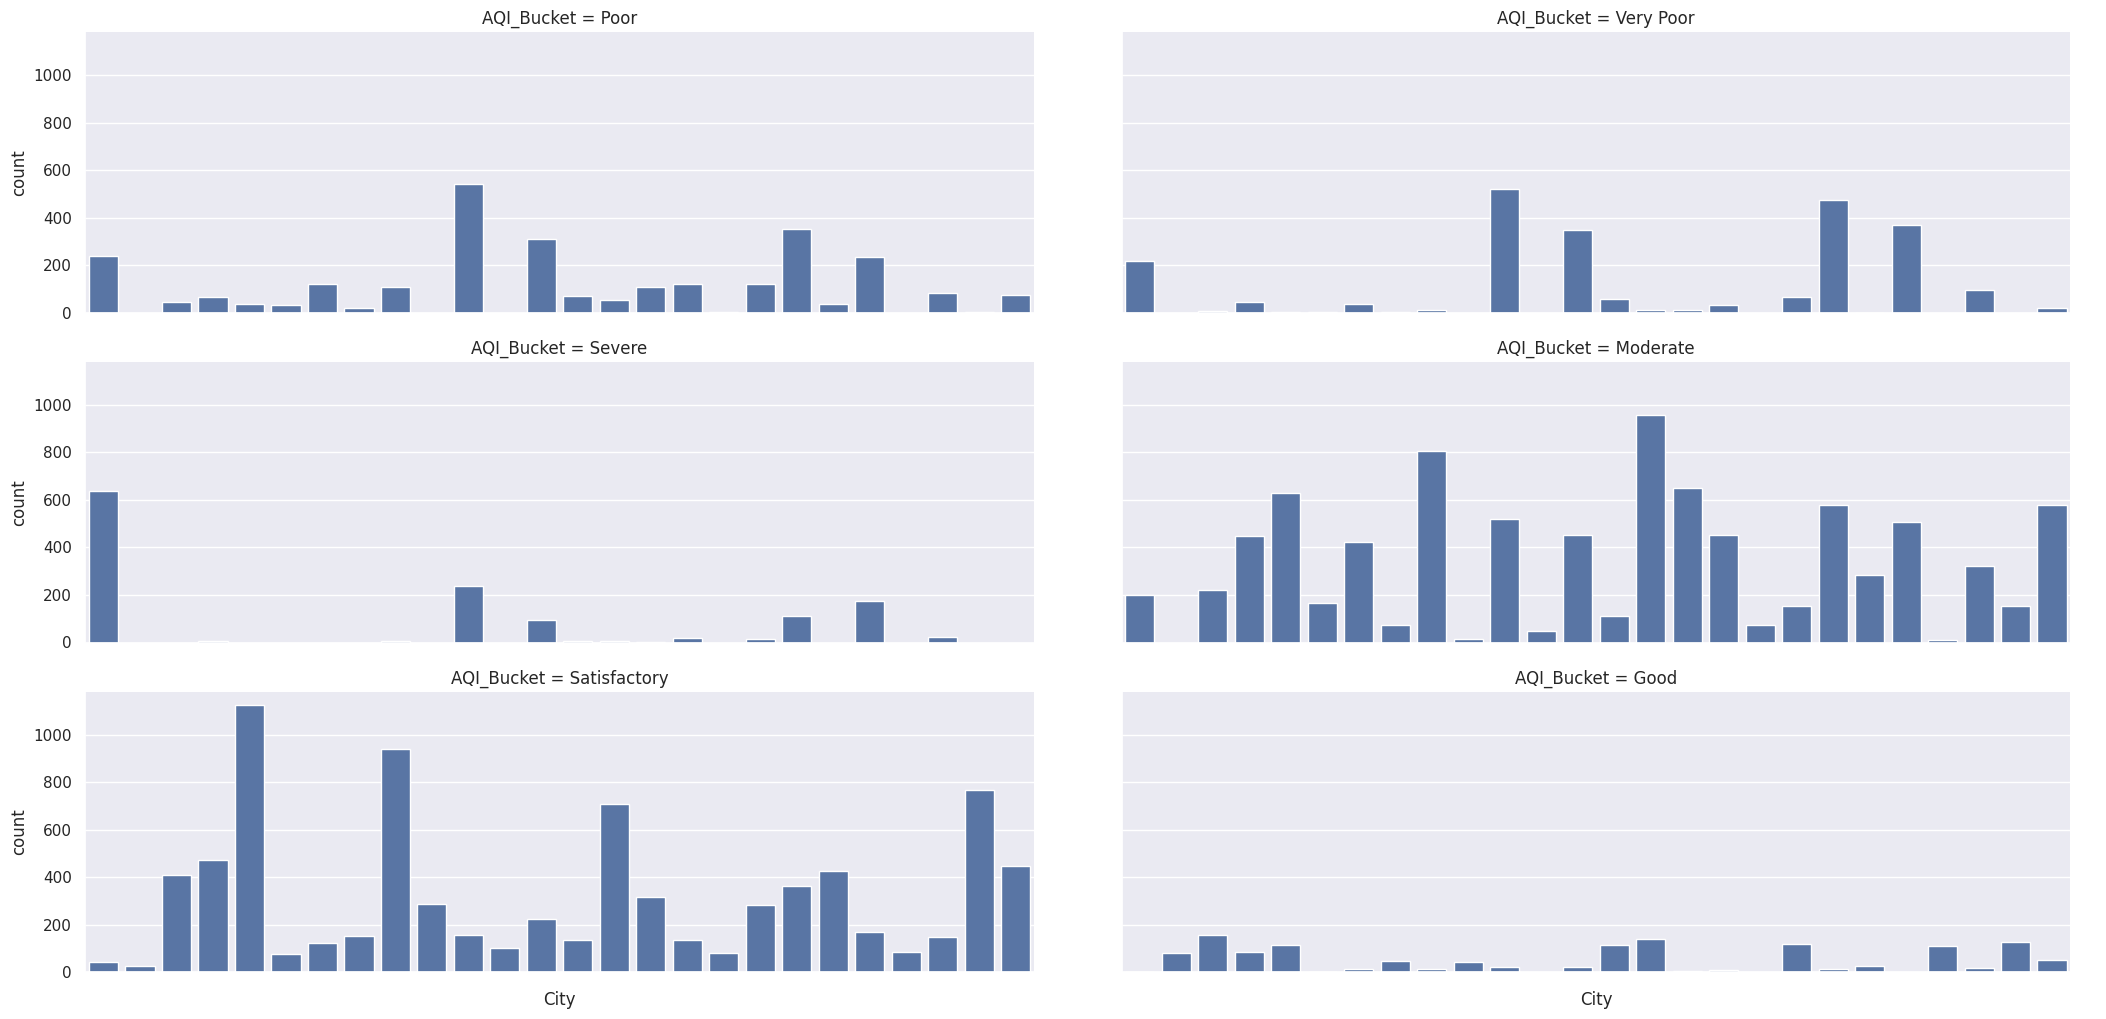

In [29]:
sns.set_theme(style='darkgrid')
graph = sns.catplot(x="City", kind='count', data = df,col="AQI_Bucket", col_wrap=2, height=3.5, aspect=3)
graph.set_xticklabels(rotation=90)
plt.show()

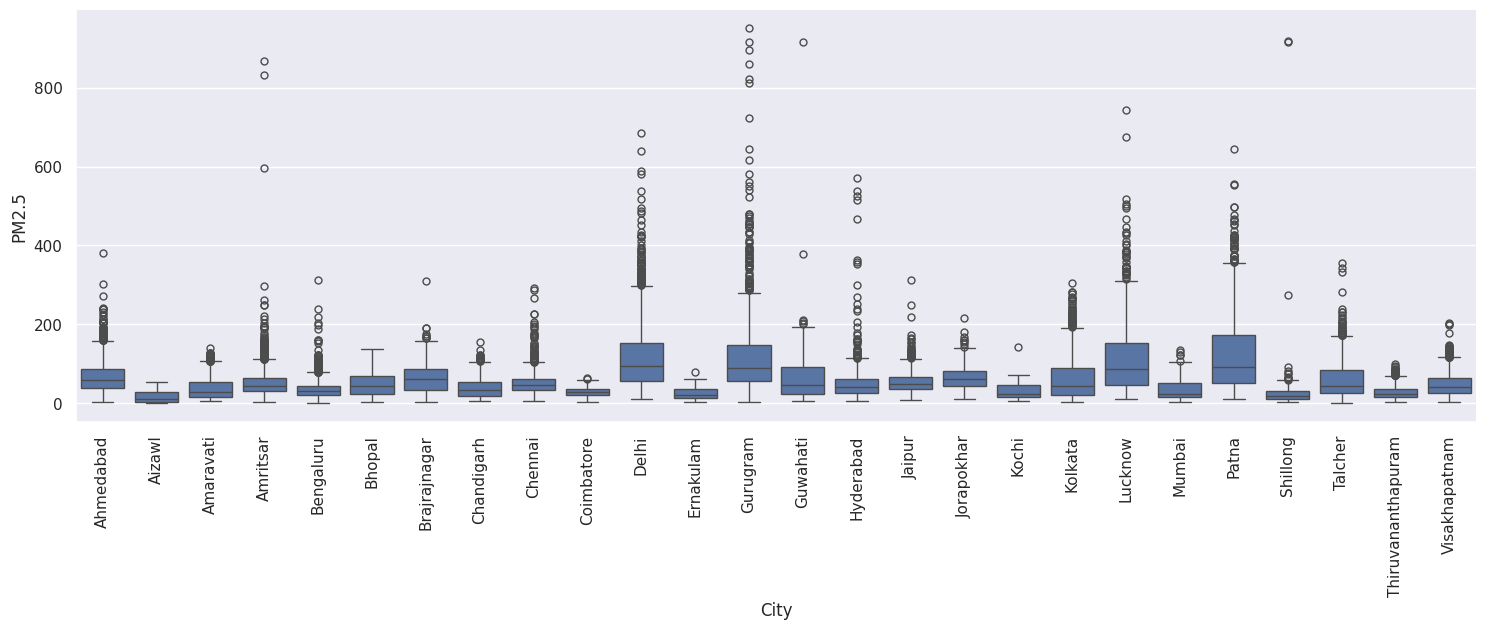

In [36]:
graph1 = sns.catplot(x="City", y = 'PM2.5', kind='box', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

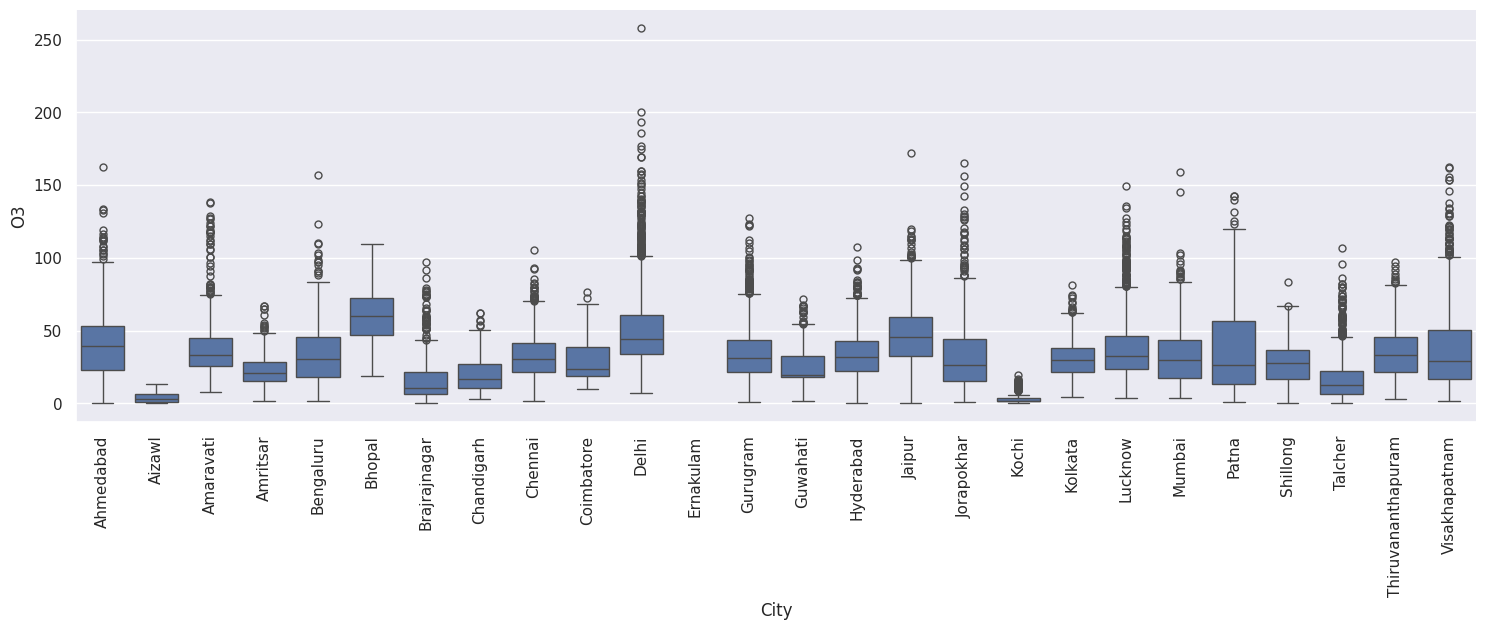

In [37]:
graph2 = sns.catplot(x="City", y = 'O3', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

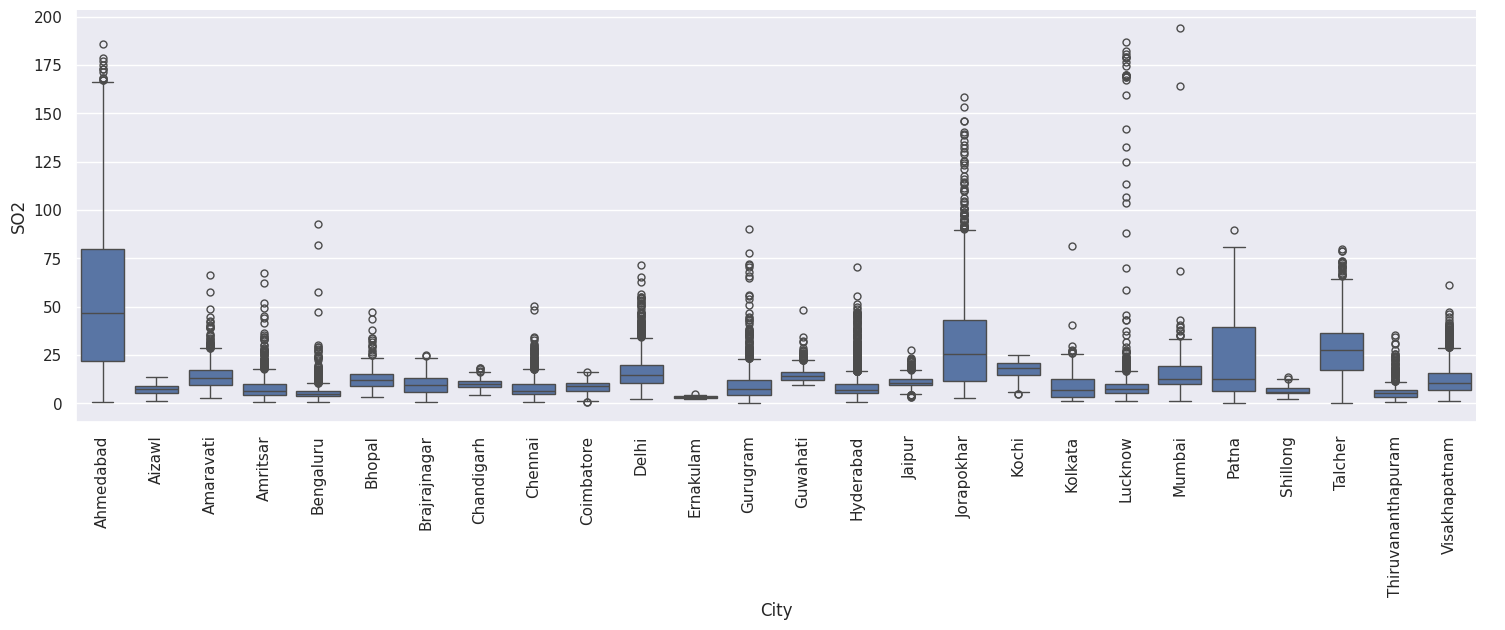

In [38]:
graph3 = sns.catplot(x="City", y = 'SO2', kind='box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

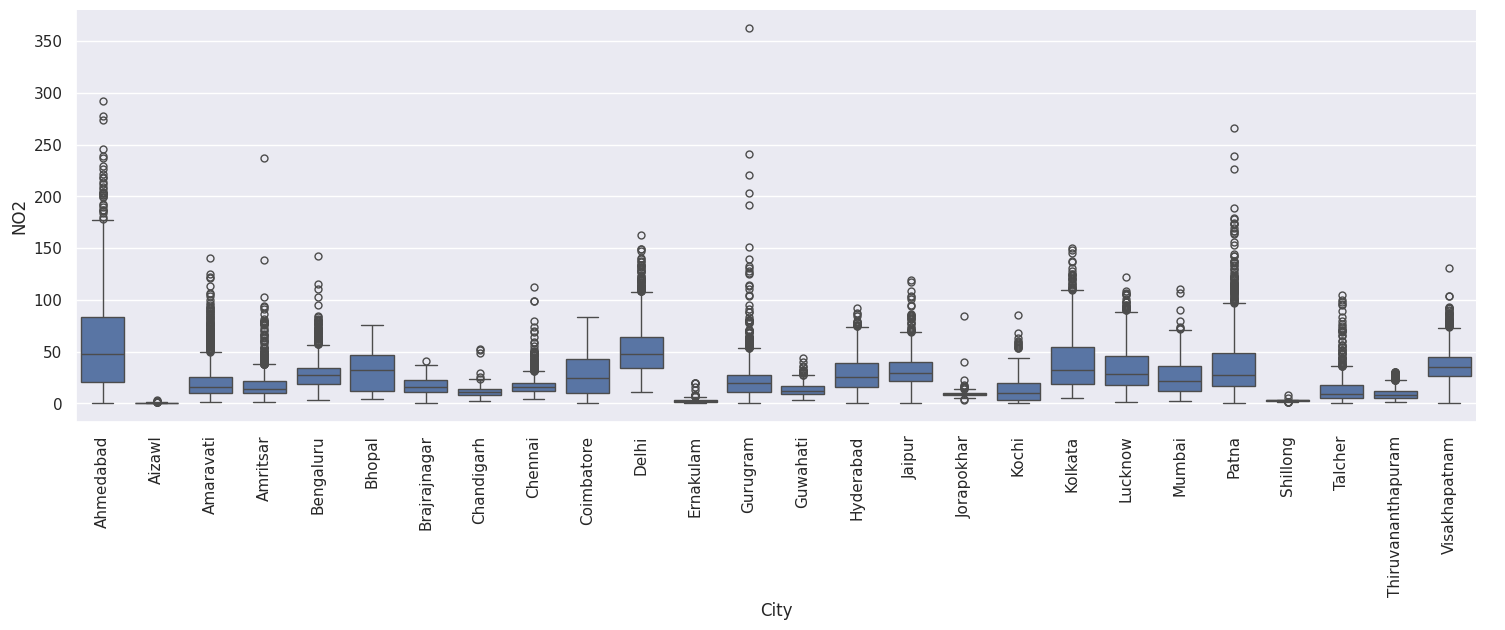

In [39]:
graph4 = sns.catplot(x="City", y = 'NO2', kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

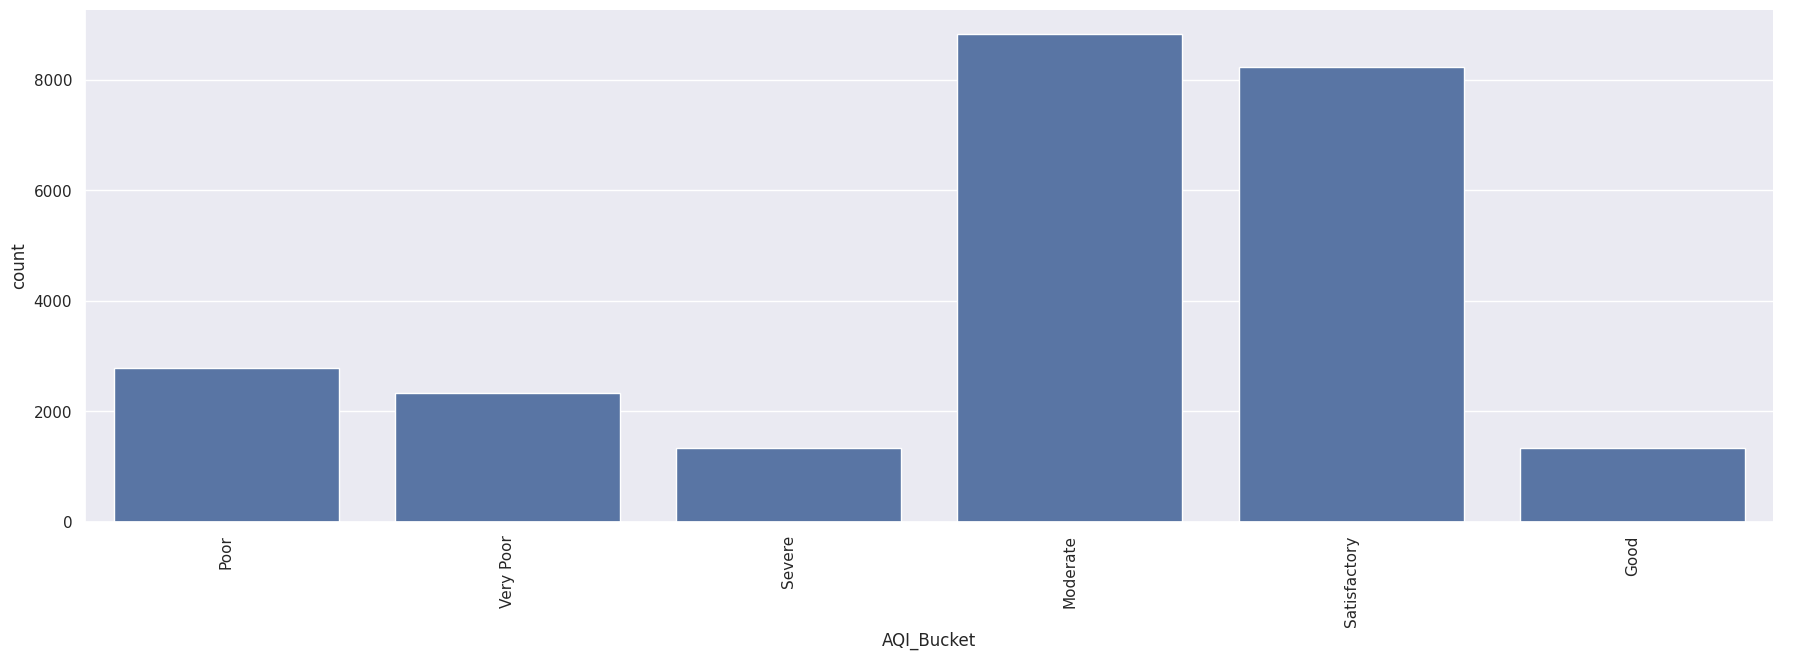

In [40]:
graph5 = sns.catplot(x="AQI_Bucket", data=df, kind='count', height=6, aspect=3 )
graph5.set_xticklabels(rotation=90)

In [42]:
df.isnull().sum().sort_values(ascending = False)

,0
Xylene,18109
PM10,11140
NH3,10328
Toluene,8041
Benzene,5623
AQI,4681
AQI_Bucket,4681
PM2.5,4598
NOx,4185
O3,4022


In [43]:
df.describe().loc['mean']

,mean
PM2.5,67.450578
PM10,118.127103
NO,17.574730
NO2,28.560659
NOx,32.309123
NH3,23.483476
CO,2.248598
SO2,14.531977
O3,34.491430
Benzene,3.280840


In [44]:
df = df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
     "NO":	{np.nan:17.574730},
     "NO2":	{np.nan:28.560659},
     "NOx":	{np.nan:32.309123},
     "NH3":	{np.nan:23.483476},
     "CO":	{np.nan:2.248598},
     "SO2":	{np.nan:14.531977},
     "O3":	{np.nan:34.491430},
     "Benzene":	{np.nan:3.280840},
     "Toluene":	{np.nan:8.700972},
     "Xylene":	{np.nan:3.070128}


})

In [45]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [47]:
df = df.drop(['AQI_Bucket'], axis=1)

In [48]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.476613,118.454435,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,2015-01-02,67.476613,118.454435,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,2015-01-03,67.476613,118.454435,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,2015-01-04,67.476613,118.454435,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,2015-01-05,67.476613,118.454435,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,NaN


<Axes: >

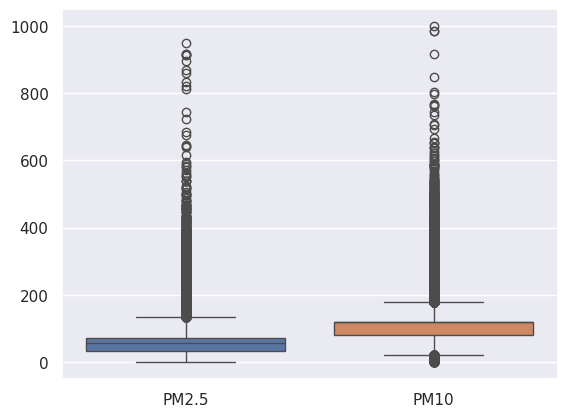

In [49]:
sns.boxplot(data = df[['PM2.5', 'PM10']])

<Axes: >

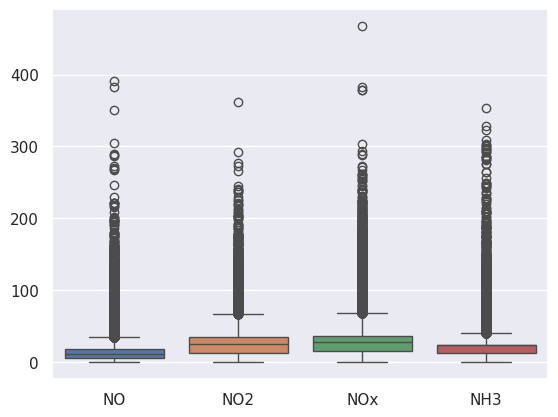

In [50]:
sns.boxplot(data = df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

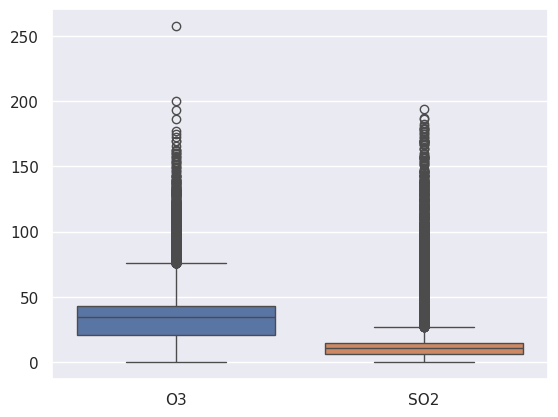

In [51]:
sns.boxplot(data = df[['O3', 'SO2']])

In [64]:
def replace_outerliers(df):
  for column in df.select_dtypes(include='number').columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    df[column] = df[column].apply(
        lambda x:Q1 if x < lb else (Q3 if x > ub else x)
    )
  return df

In [65]:
df = replace_outerliers(df)

In [57]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,67.454632,59.414477,0.04,32.150,58.030000,72.450000,949.99
PM10,29531.0,118.250583,71.501129,0.01,79.315,118.454435,118.454435,1000.00
NO,29531.0,17.574730,21.359220,0.02,6.210,11.530000,17.574730,390.68
NO2,29531.0,28.560659,22.941051,0.01,12.980,25.240000,34.665000,362.21
NOx,29531.0,32.309123,29.317936,0.00,14.670,27.550000,36.015000,467.63
NH3,29531.0,23.483476,20.711370,0.01,12.040,23.483476,23.483476,352.89
CO,29531.0,2.248598,6.715753,0.00,0.540,0.950000,1.710000,175.81
SO2,29531.0,14.531977,16.909088,0.01,6.090,10.480000,14.531977,193.86
O3,29531.0,34.491430,20.163443,0.01,20.740,34.491430,42.730000,257.73
Benzene,29531.0,3.280840,14.226364,0.00,0.240,1.840000,3.280840,455.03


<Axes: >

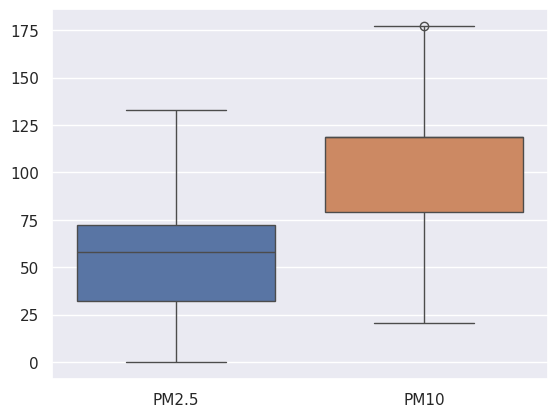

In [66]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

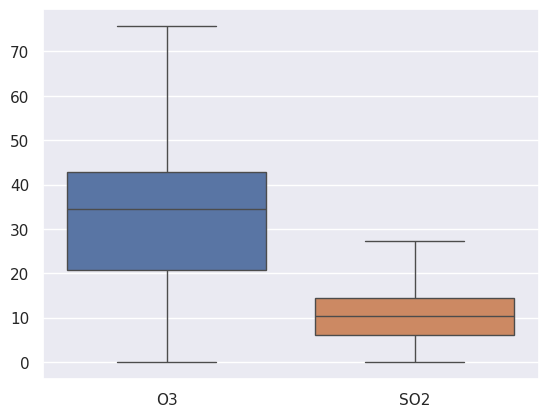

In [67]:
sns.boxplot(data=df[['O3', 'SO2']])

<Axes: >

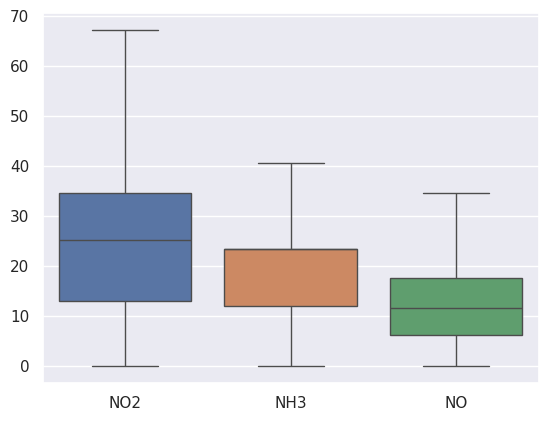

In [69]:
sns.boxplot(data=df[['NO2', 'NH3', 'NO']])

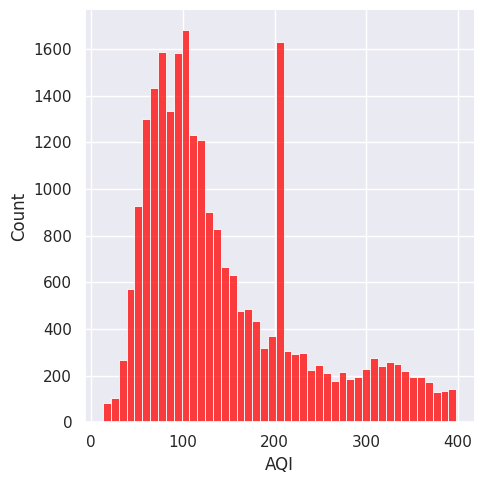

In [71]:
sns.displot(df, x = 'AQI', color='red')
plt.show()

In [72]:
df1 = df.drop(columns=['City'])

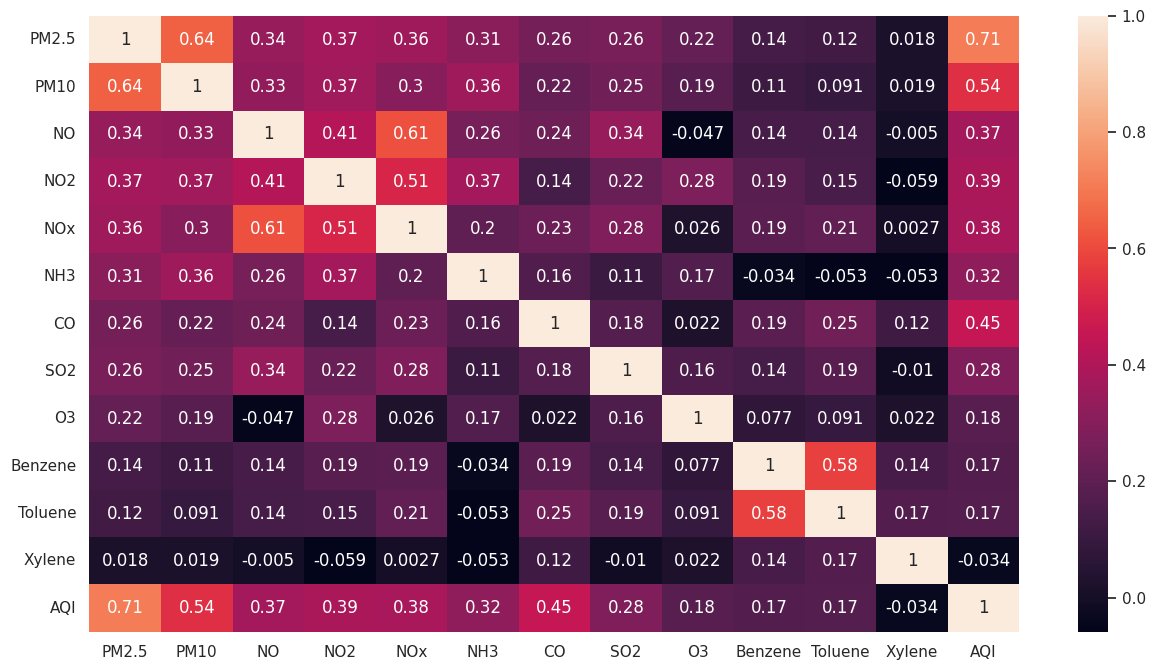

In [79]:
plt.figure(figsize=(15, 8))
# Calculate correlation for numeric columns only
sns.heatmap(df1.select_dtypes(include=np.number).corr(), annot=True)
plt.show()